In [1]:
import numpy as np
import pandas as pd
from mikeio import Dfs0, Dataset
from mikeio.eum import ItemInfo, EUMType, EUMUnit
from datetime import datetime


# Write a dfs0

In [2]:
nt = 10
d1 = np.zeros(nt)
d2 = np.ones(nt)

ds = Dataset(data=[d1,d2],
             time=pd.date_range(datetime(2000,1,1), periods=nt, freq='H'), # hourly data
             items=[ItemInfo("Zeros", EUMType.Water_Level, EUMUnit.meter), 
                    ItemInfo("Ones", EUMType.Discharge, EUMUnit.meter_pow_3_per_sec)])
ds

<mikeio.Dataset>
Dimensions: (10,)
Time: 2000-01-01 00:00:00 - 2000-01-01 09:00:00
Items:
  0:  Zeros <Water Level> (meter)
  1:  Ones <Discharge> (meter pow 3 per sec)

In [3]:
ds.is_equidistant

True

In [4]:
dfs = Dfs0()

dfs.write(filename="test.dfs0", 
          data=ds,
          title="Zeros and ones")

# Read a timeseries

In [5]:
dfs = Dfs0("test.dfs0")

ds = dfs.read()
ds

<mikeio.Dataset>
Dimensions: (10,)
Time: 2000-01-01 00:00:00 - 2000-01-01 09:00:00
Items:
  0:  Zeros <Water Level> (meter)
  1:  Ones <Discharge> (meter pow 3 per sec)

## From comma separated file

In [6]:
df = pd.read_csv("../tests/testdata/co2-mm-mlo.csv", parse_dates=True, index_col='Date', na_values=-99.99)
df.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


Remove missing values

<AxesSubplot:xlabel='Date'>

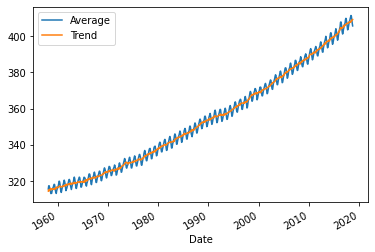

In [7]:
df = df.dropna()
df = df[["Average","Trend"]]
df.plot()

A dataframe with a datetimeindex can be used to create a dfs 0 with a non-equidistant time axis.

In [8]:
df.to_dfs0("mauna_loa_co2.dfs0")

To get a equidistant time axis first interpolate to hourly values.

In [9]:
df_h = df.resample('h').interpolate()

In [10]:
df_h.to_dfs0("mauna_loa_co2_eq_1hr.dfs0")

# Read a timeseries

In [11]:
dfs = Dfs0("test.dfs0")
res = dfs.read()
res

<mikeio.Dataset>
Dimensions: (10,)
Time: 2000-01-01 00:00:00 - 2000-01-01 09:00:00
Items:
  0:  Zeros <Water Level> (meter)
  1:  Ones <Discharge> (meter pow 3 per sec)

In [12]:
res.time

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [13]:
res.data

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

## Or as a Pandas dataframe

In [14]:
dfs0file = r"../tests/testdata/da_diagnostic.dfs0"

dfs = Dfs0(dfs0file)
df = dfs.to_dataframe()
df.head()

,State 1Sign. Wave Height,State 2Sign. Wave Height,Mean StateSign. Wave Height,MeasurementSign. Wave Height
2017-10-27 00:00:00,1.749465,1.749465,1.749465,1.72
2017-10-27 00:10:00,1.811340,1.796895,1.807738,NaN
2017-10-27 00:20:00,1.863424,1.842759,1.853422,NaN
2017-10-27 00:30:00,1.922261,1.889839,1.897670,NaN
2017-10-27 00:40:00,1.972455,1.934886,1.935281,NaN


In [15]:
dfs0file = r"../tests/testdata/random.dfs0"

dfs = Dfs0(dfs0file)
df = dfs.to_dataframe()
df.head()

,VarFun01,NotFun
2017-01-01 00:00:00,0.843547,0.640486
2017-01-01 05:00:00,0.093729,0.653257
2017-01-01 10:00:00,NaN,NaN
2017-01-01 15:00:00,0.305065,0.214208
2017-01-01 20:00:00,0.900190,0.999157


## Create a timeseries with non-equidistant data

In [16]:
d1 = np.random.uniform(low=0.0, high=5.0, size=5)

ds = Dataset(data=[d1],
             time=[
                    datetime(2000, 1, 1, 0, 0),
                    datetime(2000, 1, 8, 0, 0),
                    datetime(2000, 1, 10, 0, 0),
                    datetime(2000, 2, 22, 0, 0),
                    datetime(2000, 11, 29, 0, 0)],
            items=[ItemInfo("Random")])

ds

<mikeio.Dataset>
Dimensions: (5,)
Time: 2000-01-01 00:00:00 - 2000-11-29 00:00:00
Items:
  0:  Random <Undefined> (undefined)

In [17]:
ds.is_equidistant

False

In [18]:
dfs = Dfs0()
dfs.write(filename="neq.dfs0",
           data=ds,
           title="Non equidistant"
)

## Create a timeseries with accumulated timestep

## Find correct eum units

In [19]:
EUMType.search("prec")

[Correction of precipitation,
 Precipitation correction,
 Precipitation,
 Specific Precipitation,
 Precipitation Rate]

In [20]:
EUMType.Precipitation_Rate.units

[mm per day,
 mm per hour,
 cm per hour,
 meter per sec,
 meter per day,
 feet per day,
 inch per hour,
 inch per min,
 inch per day,
 mm per year]

In [21]:
from mikecore.DfsFile import DataValueType

n= 1000

data = [np.random.random([n]),np.random.random([n])]

time = pd.date_range("2017-01-01 00:00", freq='H', periods=n)

items = [ItemInfo(EUMType.Water_Level, data_value_type=DataValueType.Instantaneous), # use default name and unit based on type
        ItemInfo("Nedbør", EUMType.Precipitation_Rate, data_value_type=DataValueType.Accumulated)] # use a custom name

ds = Dataset(data, time, items)


dfs = Dfs0()
dfs.write(filename='accumulated.dfs0',
          data=ds,
          title='Hello Test')

In [22]:
dfs = Dfs0("accumulated.dfs0")
ds = dfs.read()
ds

<mikeio.Dataset>
Dimensions: (1000,)
Time: 2017-01-01 00:00:00 - 2017-02-11 15:00:00
Items:
  0:  Water Level <Water Level> (meter)
  1:  Nedbør <Precipitation Rate> (mm per day)

# Modify an existing timeseries

The `write` method allows to modify the data without the need of specifying names, units etc. If you need to add variables, rename, change units, you must use `create` instead.

In [23]:
dfs = Dfs0("test.dfs0")
res = dfs.read()
res

<mikeio.Dataset>
Dimensions: (10,)
Time: 2000-01-01 00:00:00 - 2000-01-01 09:00:00
Items:
  0:  Zeros <Water Level> (meter)
  1:  Ones <Discharge> (meter pow 3 per sec)

In [24]:
res['Ones']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Modify the data in some way...

In [25]:
data = res.data
data[1] = data[1]*np.pi
data[1]

array([3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265])

In [26]:
from shutil import copyfile
copyfile("test.dfs0","modified.dfs0")
dfs.write("modified.dfs0", res)

In [27]:
dfs = Dfs0("modified.dfs0")
res = dfs.read()
res['Ones']

array([3.14159274, 3.14159274, 3.14159274, 3.14159274, 3.14159274,
       3.14159274, 3.14159274, 3.14159274, 3.14159274, 3.14159274])

The second item is modified.

In [28]:
res['Zeros']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Convert units

Read a file with waterlevel i meters.

In [29]:

filename = r"C:\Program Files (x86)\DHI\MIKE Zero\2021\Examples\MIKE_21\FlowModel_FM\HD\Oresund\Data\1993\Boundary_Conditions\waterlevel_viken.dfs0"
dfs = Dfs0(filename)
ds = dfs.read()
ds

<mikeio.Dataset>
Dimensions: (577,)
Time: 1993-12-02 00:00:00 - 1993-12-14 00:00:00
Items:
  0:  ST 2: WL (m) <Water Level> (meter)

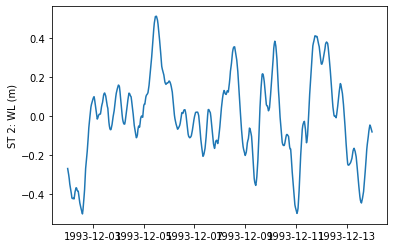

In [30]:
import matplotlib.pyplot as plt
plt.plot(ds.time,ds.data[0])
plt.ylabel(ds.items[0].name);

The aim is to convert this timeseries to feet (1m = 3.3 ft)

In [31]:
data = ds.data
data[0] = data[0]*3.3

Which units are acceptable?

In [32]:
ds.items[0].type.units

[meter,
 kilometer,
 centimeter,
 millimeter,
 feet,
 feet US,
 inch,
 inch US,
 mile,
 mile US,
 yard,
 yard US]

In [33]:
dfs = Dfs0()

items = ds.items
items[0].name = "Viken"
items[0].unit = EUMUnit.feet

dfs.write(filename='wl_feet.dfs0', data=ds.data,
           start_time=ds.time[0],
            dt = 1800,
            items=items)

![WL](https://github.com/DHI/mikeio/raw/main/images/wl_feet.png)

## Extrapolation

<AxesSubplot:>

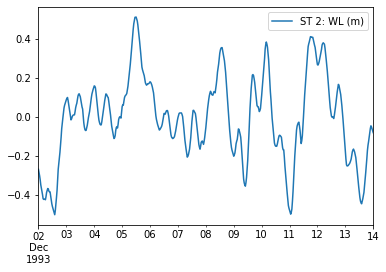

In [34]:
filename = r"C:\Program Files (x86)\DHI\MIKE Zero\2021\Examples\MIKE_21\FlowModel_FM\HD\Oresund\Data\1993\Boundary_Conditions\waterlevel_viken.dfs0"
dfs = Dfs0(filename)
ds = dfs.read()
df = ds.to_dataframe()
df.plot()

<AxesSubplot:>

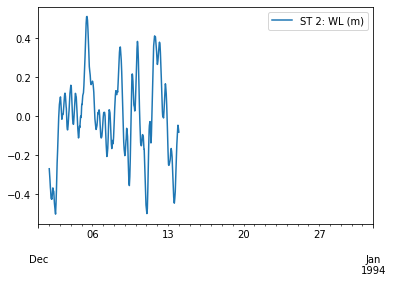

In [35]:
from datetime import date
rng = pd.date_range("1993-12-1","1994-1-1",freq='30t')
ix = pd.DatetimeIndex(rng)
dfr = df.reindex(ix)
dfr.plot()

Replace NaN with constant extrapolation (forward fill + back fill).

<AxesSubplot:>

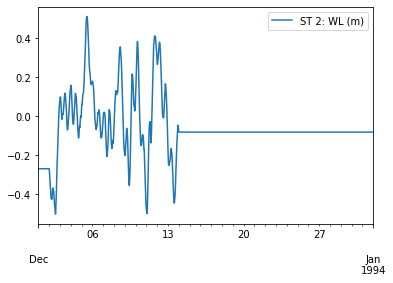

In [36]:
dfr = dfr.ffill().bfill()
dfr.plot()

In [37]:
dfr.to_dfs0("Viken_extrapolated.dfs0", items=ds.items, title="Caution extraplolated data!")

## Clean up

In [38]:
import os

os.remove("test.dfs0")
os.remove("modified.dfs0")
os.remove("neq.dfs0")
os.remove("accumulated.dfs0")
os.remove("wl_feet.dfs0")
os.remove("mauna_loa_co2_eq_1hr.dfs0")
os.remove("mauna_loa_co2.dfs0")
os.remove("Viken_extrapolated.dfs0")